
# 4.2 Nonlinear equations
##### Relaxation method

We try to solve an equaiton like $x = 2 - e^{-x}$ (notice the x on the left side)<br>
We do it by iteration. We propose a solution $x_1$ and put it into the RHS to get a new number for a second approach and so on:

In [1]:
from math import exp
x= 1
for k in range(10):
    x = 2 - exp(-x)
    print(x)

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


It is important to have an x on the left side as we saw. Now consider for example $x = e^{1-x^2}$

In [2]:
from math import exp
x= 1/2
for k in range(10):
    x = exp(1-x**2)
    print(x)
    
# it doesn't converge so nicely. 

2.117000016612675
0.030755419069985038
2.715711832754083
0.0017034651847384463
2.71827394057758
0.001679913095081425
2.7182741571849562
0.0016799111168229455
2.7182741572030236
0.0016799111166579386


In [3]:
# but we can rewrite it in a second way:

from math import *
x= 2
for k in range(10):
    x = sqrt(1-log(x))
    print(x)
  

0.5539429748990907
1.26122699421159
0.8763075646981526
1.0639728137568971
0.9684989212112417
1.0158779011335735
0.9920921500118133
1.0039617935232876
0.9980210587528792
1.000989960957904


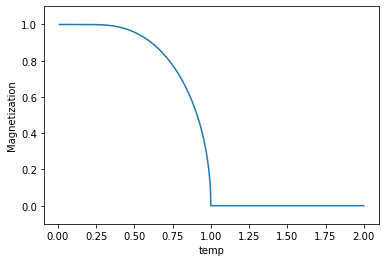

In [4]:
# Example Ferromagnetism

# consider m = mu tanh (Cm/T)

from math import tanh , cosh
from numpy import linspace
from pylab import plot, show, ylim, xlabel, ylabel

# constants
Tmax= 2
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y=[]
temp = linspace(0.01,Tmax,points)


# Temperature Loop
for T in temp:
    m1 = 1
    error = 1
    
    # loop until the error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T) , m1
        error = abs((m1-m2)/(1-T*cosh(m2/T)**2))
    y.append(m1)
    
# make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("temp")
ylabel("Magnetization")
show()





##### Relaxation two variables. 

We want to solve two equations of the form $x = f(x,y) , y = g(x,y)$
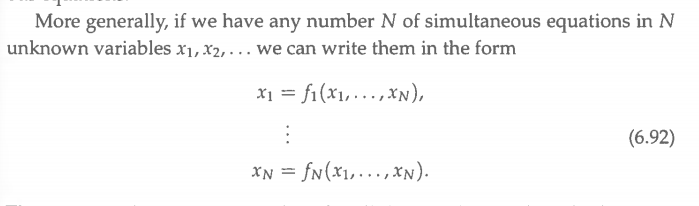
Entonces escogemos valores iniciales para todas las variables y vamos iterando. A veces funciona y a veces no

##### Binary search 
We want to solve an equation of the type $f(x) = 0$ on an interval $[x_1, x_2]$ <br>
We compute $f(x_1)$ and $f(x_2)$ if the signs are different (say $f(x_1) > 0$ and $f(x_2) < 0$ ) , we define the midpoint $x'$. If the sign of $x'$ is negative, then we re apply the algorithm for $[x_1, x']$ if not, we do it in $[x',x_2]$ and so on.

In [5]:
import numpy as np

def signo(p):
    if p >= 0:
        return(1)
    else:
        return(-1)


def binary(f,x1,x2,accura):
    mp = (x1+x2)/2
    if x2-x1<accura:
        print(mp)
        return()
    sx1 = signo(f(x1))
    sx2 = signo(f(x2))

    
    mp = (x1+x2)/2
    if signo(f(mp)) == sx1:
        binary(f,mp,x2,accura)
    else:
        binary(f,x1,mp,accura)
        
# solve the equation 5e^{-x} + x - 5 = 0 with accuracy 10^{-6}


def f(x):
    return(5*np.exp(-x) + x - 5)

binary(f,1,6,0.001)
    
 

    
    

4.96514892578125


##### Newtons method
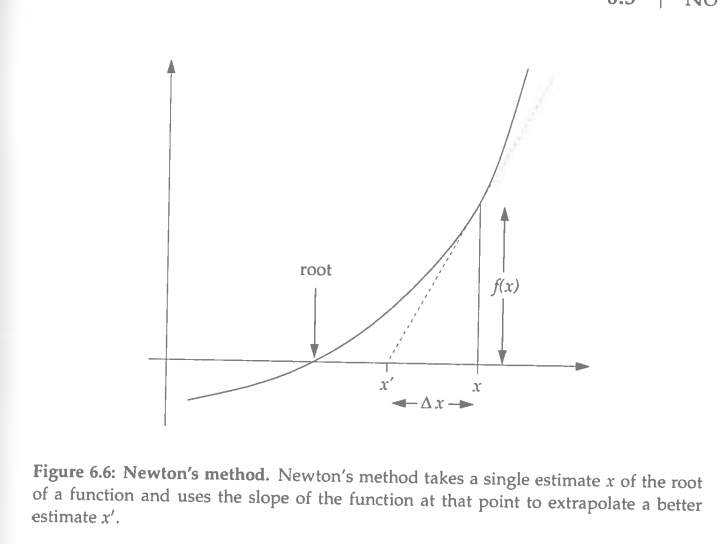

We are looking for a root of a function. <br>
We begin with a first guess $x$ and then obtain the intersection in the x axis of the tangent line, which will be $x' = x - \Delta x = x - \dfrac{f(x)}{f'(x)}$

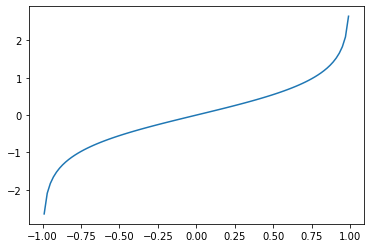

In [6]:
# Example: calculate the arctangent of a given number u
# that is, solve the equation u - tanh x = 0 

# for this problem, we have that   x' = x - (tanh x - u) cosh^2 x 

import numpy as np
from matplotlib import pyplot as plt

accuracy = 1e-12
def arctanh(u):
    x = 0
    delta =1
    while abs(delta) > accuracy:
        delta = (np.tanh(x)-u)*np.cosh(x)**2
        x -= delta
    return x

up = np.linspace(-0.99,0.99,100)
xp =[]
for u in up:
    xp.append(arctanh(u))
plt.plot(up,xp)
plt.show()

##### Secant method

We start with two points x1, x2 (not necessary bracketing the root as in binary). Then we calculate $f'(x_2) \simeq \dfrac{f(x_2) - f(x_1)}{x_2 - x_1}$ <br>
And we use this for the formula in Newton method to get the new point
$x_3 = x_2 - f(x_2) \dfrac{x_2 - x_1}{f(x_2) - f(x_1)}$
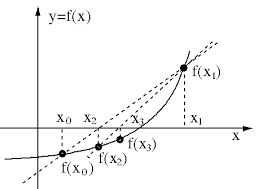

Now we repeat with the last two points until we reach the desired level of accuracy